
===== MEJOR SOLUCIÓN =====
Mejor Costo Total: 2283.65
Mejor Distancia Total: 9003.92 km
Mejor Recorrido: Ciudad de México -> Cuernavaca -> Toluca -> Querétaro -> Guanajuato -> San Luis Potosí -> Ciudad Victoria -> Monterrey -> Saltillo -> Durango -> Chihuahua -> Hermosillo -> Mexicali -> La Paz -> Culiacán -> Tepic -> Zacatecas -> Aguascalientes -> Guadalajara -> Colima -> Morelia -> Chilpancingo -> Oaxaca -> Tuxtla Gutiérrez -> Villahermosa -> Chetumal -> Mérida -> Campeche -> Xalapa -> Puebla -> Tlaxcala -> Pachuca


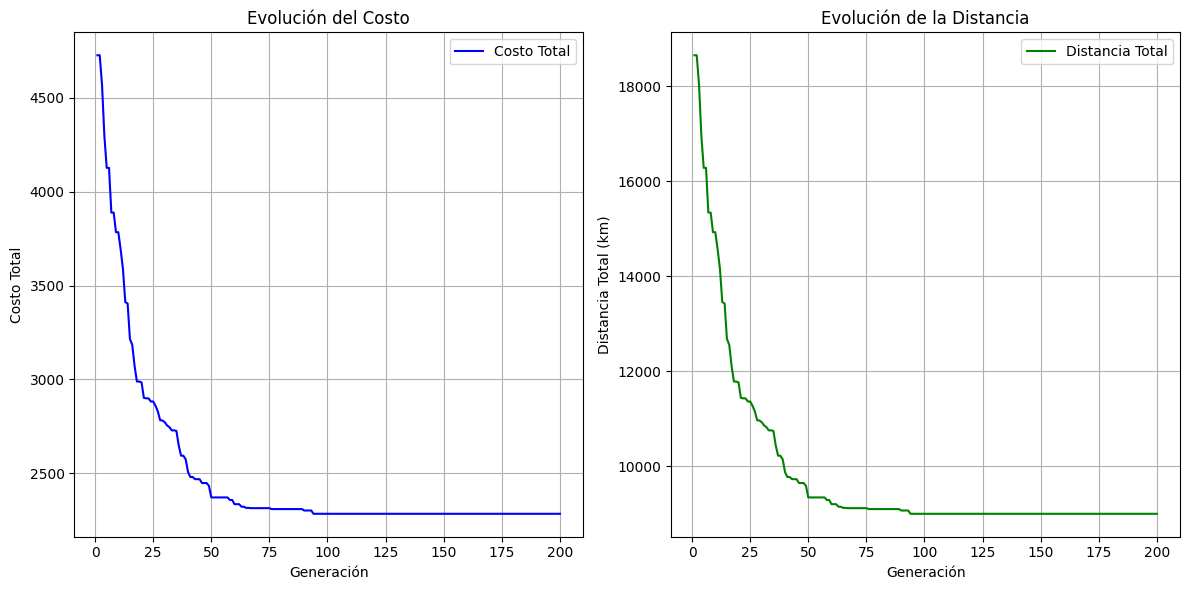

<ipython-input-13-868b7cd1b100>:224: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import imageio
import os
from itertools import permutations
from math import radians, sin, cos, sqrt, atan2



# Configuración del problema
ciudades = {
    "Aguascalientes": (21.8823, -102.2826),
    "Mexicali": (32.6245, -115.4523),
    "La Paz": (24.1444, -110.3005),
    "Campeche": (19.8301, -90.5349),
    "Saltillo": (25.4382, -100.9764),
    "Colima": (19.2433, -103.7250),
    "Tuxtla Gutiérrez": (16.7569, -93.1292),
    "Chihuahua": (28.6320, -106.0691),
    "Ciudad de México": (19.4326, -99.1332),
    "Durango": (24.0277, -104.6532),
    "Guanajuato": (21.0181, -101.2587),
    "Chilpancingo": (17.5515, -99.5058),
    "Pachuca": (20.1011, -98.7591),
    "Guadalajara": (20.6597, -103.3496),
    "Toluca": (19.2826, -99.6557),
    "Morelia": (19.7032, -101.2574),
    "Cuernavaca": (18.9186, -99.2340),
    "Tepic": (21.5067, -104.8934),
    "Monterrey": (25.6866, -100.3161),
    "Oaxaca": (17.0732, -96.7266),
    "Puebla": (19.0414, -98.2063),
    "Querétaro": (20.5888, -100.3899),
    "Chetumal": (18.5036, -88.3054),
    "San Luis Potosí": (22.1565, -100.9855),
    "Culiacán": (24.8091, -107.3940),
    "Hermosillo": (29.0729, -110.9559),
    "Villahermosa": (17.9895, -92.9475),
    "Ciudad Victoria": (23.7369, -99.1411),
    "Tlaxcala": (19.3182, -98.2373),
    "Xalapa": (19.5429, -96.9103),
    "Mérida": (20.9674, -89.5926),
    "Zacatecas": (22.7709, -102.5833)
}

n_ciudades = len(ciudades)
ciudades_nombres = list(ciudades.keys())
coordenadas = np.array(list(ciudades.values()))

# Datos del automóvil
consumo_combustible = 0.0946  # litros/km
costo_litro_combustible = 1.4  # moneda deseada

# Costos adicionales
costo_hora = 7.25
velocidad_promedio = 60  # km/h
costos_peajes = 0.1

# Función de distancia (en km)
def calcular_distancia(coord1, coord2):
    R = 6371  # Radio de la Tierra en kilómetros
    lat1, lon1 = radians(coord1[0]), radians(coord1[1])
    lat2, lon2 = radians(coord2[0]), radians(coord2[1])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c # Conversión aproximada de grados a km

# Matriz de costos
def calcular_costo_total():
    matriz_distancia = np.zeros((n_ciudades, n_ciudades))
    matriz_costos = np.zeros((n_ciudades, n_ciudades))
    for i in range(n_ciudades):
        for j in range(n_ciudades):
            if i != j:
                distancia = calcular_distancia(coordenadas[i], coordenadas[j])
                tiempo = distancia / velocidad_promedio
                costo_combustible = distancia * consumo_combustible * costo_litro_combustible
                matriz_distancia[i, j] = distancia
                matriz_costos[i, j] = (
                    tiempo * costo_hora + costo_combustible + costos_peajes
                )
    return matriz_distancia, matriz_costos

matriz_distancia, matriz_costos = calcular_costo_total()

# Algoritmo Genético
def fitness(ruta):
    return sum(matriz_costos[ruta[i], ruta[i+1]] for i in range(len(ruta) - 1)) + \
           matriz_costos[ruta[-1], ruta[0]]

def calcular_distancia_total(ruta):
    return sum(matriz_distancia[ruta[i], ruta[i+1]] for i in range(len(ruta) - 1)) + \
           matriz_distancia[ruta[-1], ruta[0]]

def generar_poblacion(tamaño):
    return [random.sample(range(n_ciudades), n_ciudades) for _ in range(tamaño)]

def seleccion(poblacion):
    fitness_scores = [(ruta, fitness(ruta)) for ruta in poblacion]
    fitness_scores.sort(key=lambda x: x[1])
    return [ruta for ruta, _ in fitness_scores[: len(poblacion) // 2]]

def cruzar(ruta1, ruta2):
    corte = random.randint(1, n_ciudades - 1)
    hijo = ruta1[:corte] + [ciudad for ciudad in ruta2 if ciudad not in ruta1[:corte]]
    return hijo

def mutar(ruta):
    i, j = random.sample(range(len(ruta)), 2)
    ruta[i], ruta[j] = ruta[j], ruta[i]

def evolucionar(poblacion, prob_mutacion=0.2, elite_size=0.1):
    num_elites = int(elite_size * len(poblacion))
    fitness_scores = [(ruta, fitness(ruta)) for ruta in poblacion]
    fitness_scores.sort(key=lambda x: x[1])  # Sort by fitness (ascending)
    elites = [ruta for ruta, _ in fitness_scores[:num_elites]]

    # Selection using tournament selection
    def tournament_selection(population, k=3):  # k is tournament size
        selected = []
        for _ in range(len(population) - num_elites):
            tournament = random.sample(population, k)
            winner = min(tournament, key=fitness)
            selected.append(winner)
        return selected

    selected = tournament_selection(poblacion)

    # Crossover and mutation
    nueva_poblacion = elites
    for _ in range((len(poblacion) - num_elites) // 2):
        ruta1, ruta2 = random.sample(selected, 2)
        hijo1 = cruzar(ruta1, ruta2)
        hijo2 = cruzar(ruta2, ruta1)
        if random.random() < prob_mutacion:
            mutar(hijo1)
        if random.random() < prob_mutacion:
            mutar(hijo2)
        nueva_poblacion.extend([hijo1, hijo2])

    return nueva_poblacion

# Parámetros del algoritmo genético
poblacion_inicial = 300
generaciones = 200
poblacion = generar_poblacion(poblacion_inicial)
mejores_solutions = []
random.seed(20)

for gen in range(generaciones):
    poblacion = evolucionar(poblacion)
    mejor_ruta = min(poblacion, key=fitness)
    mejor_costo = fitness(mejor_ruta)
    mejor_distancia = calcular_distancia_total(mejor_ruta)
    mejores_solutions.append((mejor_ruta, mejor_costo, mejor_distancia))
    #print(f"Generación {gen+1}: Mejor Costo = {mejor_costo:.2f}, "
          #f"Mejor Distancia = {mejor_distancia:.2f} km")



# Mejor solución final

mejor_solucion = min(mejores_solutions, key=lambda x: x[1])
mejor_ruta, mejor_costo, mejor_distancia = mejor_solucion



print("\n===== MEJOR SOLUCIÓN =====")
print("Mejor Costo Total:", round(mejor_costo, 2))
print("Mejor Distancia Total:", round(mejor_distancia, 2), "km")
print("Mejor Recorrido:", " -> ".join(ciudades_nombres[i] for i in mejor_ruta))


# Extraer costos y distancias de las soluciones
costos_generaciones = [solucion[1] for solucion in mejores_solutions]
distancias_generaciones = [solucion[2] for solucion in mejores_solutions]

# Graficar la evolución del costo
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, generaciones + 1), costos_generaciones, color='b', label="Costo Total")
plt.title("Evolución del Costo")
plt.xlabel("Generación")
plt.ylabel("Costo Total")
plt.grid()
plt.legend()

# Graficar la evolución de la distancia
plt.subplot(1, 2, 2)
plt.plot(range(1, generaciones + 1), distancias_generaciones, color='g', label="Distancia Total")
plt.title("Evolución de la Distancia")
plt.xlabel("Generación")
plt.ylabel("Distancia Total (km)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


def crear_gif():
    filenames = []
    for idx, (ruta, _, _) in enumerate(mejores_solutions):
        plt.figure(figsize=(10, 6))
        for i in range(len(ruta)):
            ciudad_actual = coordenadas[ruta[i]]
            ciudad_siguiente = coordenadas[ruta[(i + 1) % n_ciudades]]
            plt.plot([ciudad_actual[1], ciudad_siguiente[1]],
                     [ciudad_actual[0], ciudad_siguiente[0]], 'ro-')
        plt.scatter(coordenadas[:, 1], coordenadas[:, 0], c='blue')
        plt.title(f"Generación {idx+1}")
        filename = f"frame_{idx}.png"
        filenames.append(filename)
        plt.savefig(filename)
        plt.close()

    # Crear el GIF
    with imageio.get_writer('recorrido.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

    # Eliminar los archivos temporales
    for filename in filenames:
        try:
            os.remove(filename)
        except OSError as e:
            print(f"Error al eliminar {filename}: {e}")

crear_gif()




In [ ]:
print(mejor_ruta)

[8, 16, 14, 21, 10, 23, 27, 18, 4, 9, 7, 25, 1, 2, 24, 17, 31, 0, 13, 5, 15, 11, 19, 6, 26, 22, 30, 3, 29, 20, 28, 12]


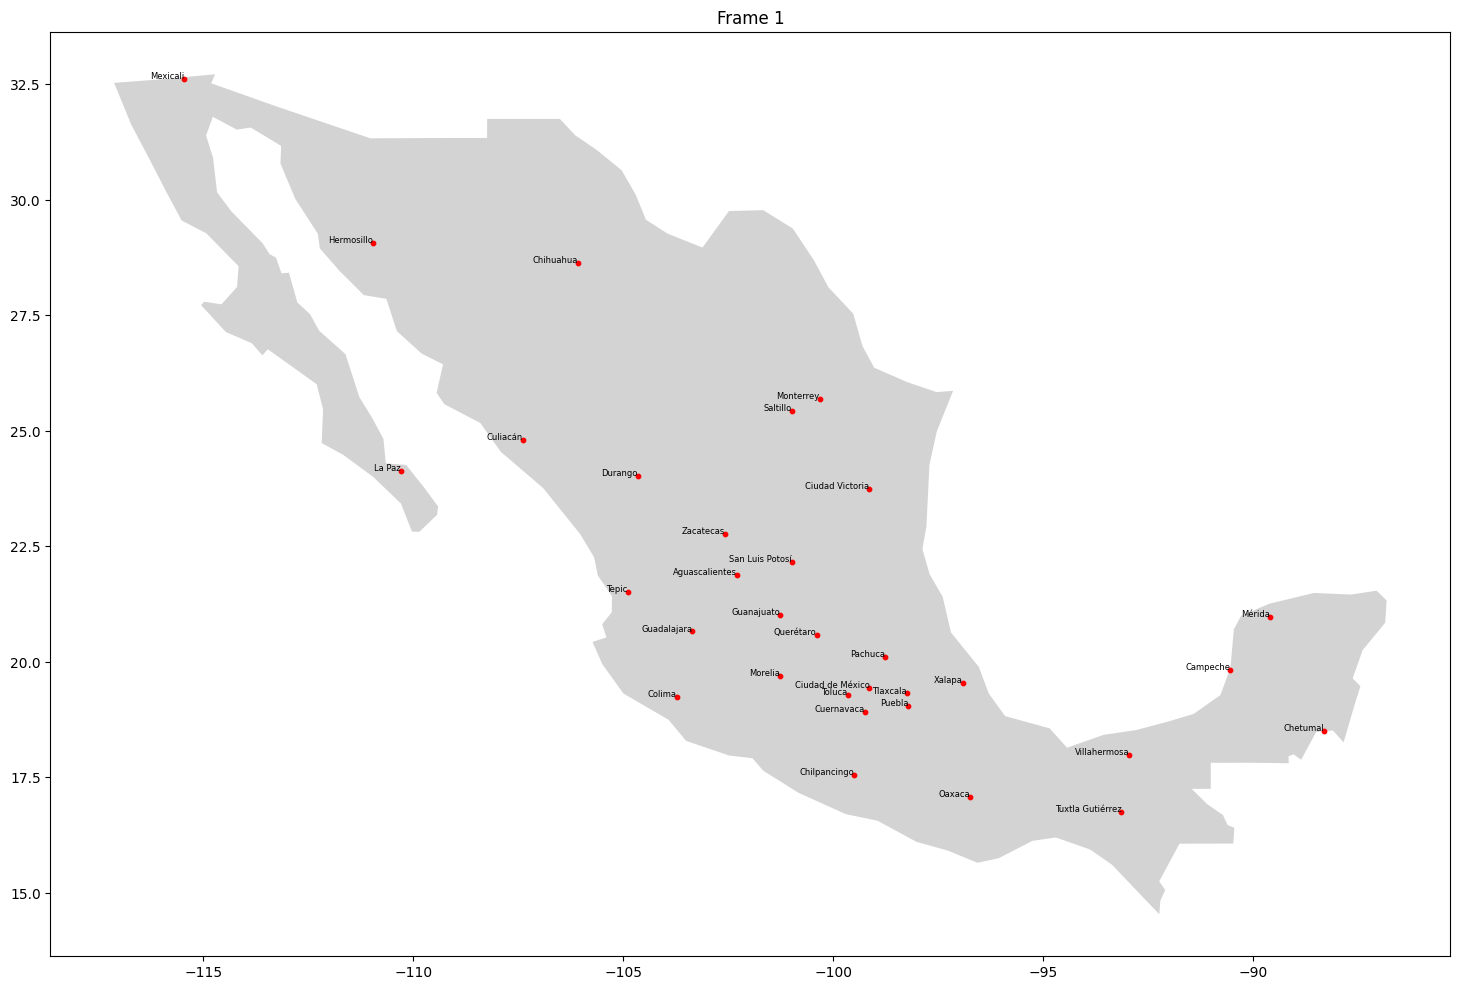

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import geopandas as gpd
from shapely.geometry import Point, LineString
import random

# Ruta a tu archivo shapefile
shapefile_path = "/content/ne_110m_admin_0_countries.shp"

# Leer el shapefile y verificar las columnas
world = gpd.read_file(shapefile_path)

# Usar 'ADMIN' para filtrar México
mexico_map = world[world["ADMIN"] == "Mexico"]

# Convertir a lista y crear un GeoDataFrame
capitales_names = list(ciudades.keys())
capitales_coords = np.array(list(ciudades.values()))
capitales_gdf = gpd.GeoDataFrame(
    {
        "nombre": capitales_names,
        "geometry": [Point(lon, lat) for lat, lon in capitales_coords],
    },
    crs="EPSG:4326",
)

# Simulación del mejor recorrido (esto debería ser el resultado de tu algoritmo ACO)
# Aquí se utiliza un recorrido aleatorio para ejemplo
mejor_recorrido = mejor_ruta

# Preparar la figura
fig, ax = plt.subplots(figsize=(20, 12))
mexico_map.plot(ax=ax, color="lightgrey")


# Función de actualización para la animación
def update(num, mejor_recorrido, ax, capitales_gdf):
    ax.clear()
    mexico_map.plot(ax=ax, color="lightgrey")
    points = [capitales_gdf.iloc[i].geometry for i in mejor_recorrido[: num + 1]]
    if len(points) > 1:
        line = LineString(points)
        new_gdf = gpd.GeoSeries([line])
        new_gdf.plot(ax=ax, color="blue", linewidth=2)
    capitales_gdf.plot(ax=ax, color="red", markersize=10)
    for x, y, label in zip(
        capitales_gdf.geometry.x, capitales_gdf.geometry.y, capitales_gdf.nombre
    ):
        ax.text(x, y, label, fontsize=6, ha="right")
    ax.set_title(f"Frame {num + 1}")


# Crear la animación
ani = FuncAnimation(
    fig,
    update,
    frames=len(mejor_recorrido),
    fargs=(mejor_recorrido, ax, capitales_gdf),
    repeat=False,
)

# Guardar a GIF
ani.save("recorrido_mexico.gif", writer="imagemagick", fps=2)